<p style="text-align:center">
    <a href="" target="_blank">
    <img src="./pagina/imagenes/Logo.png" width="190" alt="Empresa Logo"/>
    </a>
</p>

# Anotaciones
* Tener en cuenta que es el primer reto y puede que el codigo este un poco desorganizado o no este 100% puro

# **Txarli y la fabrica de chocolates**  

Se solicito crear una aplicacion web la cual el usuario pueda ver el proceso de seleccion de chocolates de su fabrica, en donde se distinga en que posicion a ido el chocolate ademas de su color

## Índice

*   Setup  
*   Datos 
    * ...
    * ...
    * ...
*   Código
    * ...
    * ...
    * ...
*   Resultados
    * Visualización de resultados
*   Conclusiones 
*   Referencias
*   Log 

## Objetivos

* Crear la aplicacion web
    *   Hacerla responsive
 

# **Setup**

Tener en cuenta que en el plc los posicion debe ser un numero entre 1 y 25 ademas de que color debe ser 1 o 0

# **Datos**

La manipulacion de los datos se hace mediante el TIA Portal, en donde la maquina nos actualiza los datos y nosotros los manipulamos en la aplicacio web los datos mas relevantes son los siguientes:
* Color
* Posicion
* Martxa

# **Código**

A continuacion se mostraran las funciones de javascript mas relevantes:

In [ ]:
//Fetch POST la cual usamos para actualizar los datos en el PLC
function enviarDatos(url, data) {
    try {
        fetch(url, {
            method: 'POST',
            headers: {
                'Content-Type': 'application/x-www-form-urlencoded',
            },
            body: data,
        })
            .then((response) => {
                if (!response.ok) {
                    throw new Error('Error de red');
                }
                const contentType = response.headers.get('Content-Type');
                return contentType.includes('application/json') ? response.json() : response.text();
            })
            .catch((error) => {
                console.error('Fetch Error:', error);
            });
    } catch (error) {
        console.log(error);
    }
}


In [3]:
//"animacion" movimiento del muffin/chocolate la cual se usa para ver como se mueve el chocolate por la tabla a su posicion
function moverElemento(color, posicion) {
	try {
		console.log("pos: " + posicion);
		console.log("actual: " + posActual);

		document.getElementById("mensaje").textContent = "Moviendo...";


		console.log("moverElemento: color = " + color + " posicion = " + posicion);
		const chocolate = document.getElementById("chocolate");

		// Obtener el div objetivo
		const divObjetivo = document.querySelector(`.tabla-chocolates .${posicion}`);

		const rectChoco = chocolate.getBoundingClientRect();
		const rectObjetivo = divObjetivo.getBoundingClientRect();

		// Calcular la distancia
		const distanciaX = rectObjetivo.left + (rectObjetivo.width / 2) - (rectChoco.width / 2) - rectChoco.left;
		const distanciaY = rectObjetivo.top + (rectObjetivo.height / 2) - (rectChoco.height / 2) - rectChoco.top;

		console.log("[moverElemento()]: distanciaX = " + distanciaX + " distanciaY =  " + distanciaY);
		// Mover el chocolate al centro del objetivo
		chocolate.style.transform = `translate(${distanciaX}px, ${distanciaY}px)`;

		//cambiar color fondo, 1 blanco 0 negro
		if (color === '1') {
			divObjetivo.style.backgroundColor = "#804000";

		}
		else {
			divObjetivo.style.backgroundColor = "white";
			divObjetivo.style.color = "black";
		}

		console.log("acabado")




		setTimeout(() => {
			// Regresar el círculo al principio
			chocolate.style.transform = `translate(0, 0)`;
			document.getElementById("mensaje").textContent = "Espere...";

		}, 4000)
		document.getElementById("dContinuar").style.display = "block";

		radioManual.checked = false;


	} catch (error) {
		console.log(error)
	}
	document.getElementById("dContinuar").style.display = "none";
	document.getElementById("continuar").style.display = "none";


}


In [3]:
//Aqui cargamos/renderizamos el gradico el cual nos indica cuantos chocolates hay contados en total por color
document.addEventListener('DOMContentLoaded', function () {
	try {
		const ctx = document.getElementById('miGrafico').getContext('2d');
		const myChart = new Chart(ctx, {
			type: 'bar',
			data: {
				labels: ['Azul (contadorBlanco)', 'Rojo (contadorNegro)'],
				datasets: [{
					label: 'Contador de Colores',
					data: [contadorBlanco, contadorNegro],
					backgroundColor: [
						'rgba(54, 162, 235, 0.2)',
						'rgba(255, 99, 132, 0.2)'
					],
					borderColor: [
						'rgba(54, 162, 235, 1)',
						'rgba(255, 99, 132, 1)'
					],
					borderWidth: 1
				}]
			},
			options: {
				scales: {
					y: {
						beginAtZero: true
					}
				}
			}
		});

		// Función para redibujar el gráfico cuando cambia el tamaño de la pantalla
		window.addEventListener('resize', function () {
			myChart.update(); // Actualiza el gráfico
		});

	} catch (error) {
		console.log(error);
	}
});

# **Resultados**

Los resultados obtenidos han sido correctos a la hora de ver el funcionamiento de la aplicacion y la forma en como obtenemos y escribimos los parametros en el TIA Portal.

## Visualización de resultados

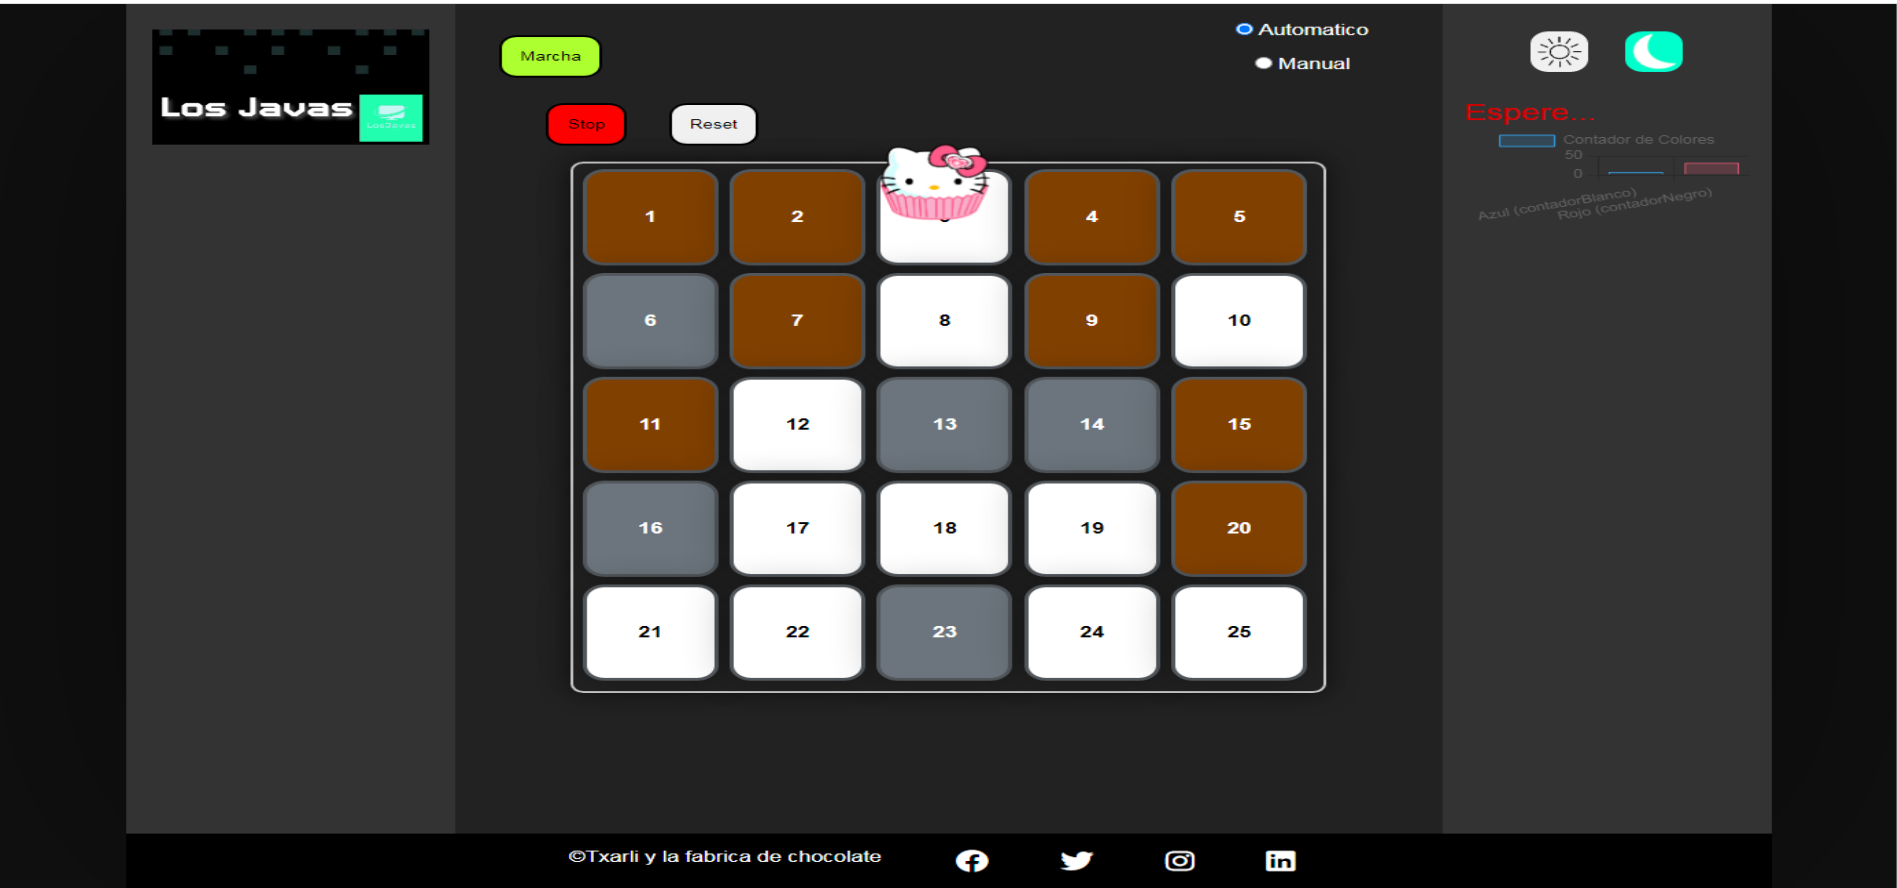


# **Conclusiones**

A futuro podria haber una nueva version mas moderna con un aplicativo movil para hacerlo mas comodo al usuario, los resultados podrian mejorar en tiempo si se mejora la velocidad de clasificacion que hace la maquina selectora

## **Log**

| Fecha (DD-MM-YYYY) | Versión |      Modificado por:    |   Cambiar descripción    |
| ------------------ | ------- | ----------------------- | ------------------------ |
| 09/10/2023         | 1.0     | Javier Jamaica Castaño  | Documentacion hecha por primera vez  |
